In [140]:
# Colab: http://dojo.geleia.group/

# Tutorial: https://medium.com/geleia/dojo-data-science-online-27122abea61b

# Dataset: http://bit.ly/cardiodados

# Objetivo: predizer doença cardiovascular

# Meta: AUC > 0.75 | Sens > 80% | Espec: 95%

In [141]:
import pandas as pd

In [142]:
df = pd.read_csv('http://bit.ly/cardiodados')

In [143]:
df.head()

,patientID,age,htn,treat,smoking,race,t2d,gender,numAge,bmi,tchol,sbp,cvd
0,HHUID00519967,70-90,N,N,N,White,N,M,83,17,156,113,N
1,HHUID00379006,40-55,N,N,N,White,N,M,44,23,167,126,N
2,HHUID00357476,55-70,Y,Y,N,White,N,M,62,16,214,175,N
3,HHUID00862369,40-55,N,N,N,White,N,M,42,22,158,102,N
4,HHUID00481496,55-70,N,N,N,White,N,M,63,24,244,132,N


In [144]:
def converte_doenca(X):
  if X == 'Y':
    return 1
  else:
    return 0

In [145]:
df.htn.map(converte_doenca)

0         0
1         0
2         1
3         0
4         0
         ..
446198    1
446199    0
446200    0
446201    1
446202    0
Name: htn, Length: 446203, dtype: int64

In [146]:
df['htn_bin'] = 0

In [147]:
df.head()

,patientID,age,htn,treat,smoking,race,t2d,gender,numAge,bmi,tchol,sbp,cvd,htn_bin
0,HHUID00519967,70-90,N,N,N,White,N,M,83,17,156,113,N,0
1,HHUID00379006,40-55,N,N,N,White,N,M,44,23,167,126,N,0
2,HHUID00357476,55-70,Y,Y,N,White,N,M,62,16,214,175,N,0
3,HHUID00862369,40-55,N,N,N,White,N,M,42,22,158,102,N,0
4,HHUID00481496,55-70,N,N,N,White,N,M,63,24,244,132,N,0


In [148]:
df.htn_bin.value_counts()

0    446203
Name: htn_bin, dtype: int64

In [149]:
df['htn_bin'] = df.htn.map(converte_doenca)

In [150]:
df['htn_bin'].value_counts()

0    318491
1    127712
Name: htn_bin, dtype: int64

In [151]:
df['treat_bin'] = df.treat.map(converte_doenca)
df['smk_bin'] = df.smoking.map(converte_doenca)
df['t2d_bin'] = df.t2d.map(converte_doenca)
df['cvd_bin'] = df.cvd.map(converte_doenca)

In [152]:
df.head()

,patientID,age,htn,treat,smoking,race,t2d,gender,numAge,bmi,tchol,sbp,cvd,htn_bin,treat_bin,smk_bin,t2d_bin,cvd_bin
0,HHUID00519967,70-90,N,N,N,White,N,M,83,17,156,113,N,0,0,0,0,0
1,HHUID00379006,40-55,N,N,N,White,N,M,44,23,167,126,N,0,0,0,0,0
2,HHUID00357476,55-70,Y,Y,N,White,N,M,62,16,214,175,N,1,1,0,0,0
3,HHUID00862369,40-55,N,N,N,White,N,M,42,22,158,102,N,0,0,0,0,0
4,HHUID00481496,55-70,N,N,N,White,N,M,63,24,244,132,N,0,0,0,0,0


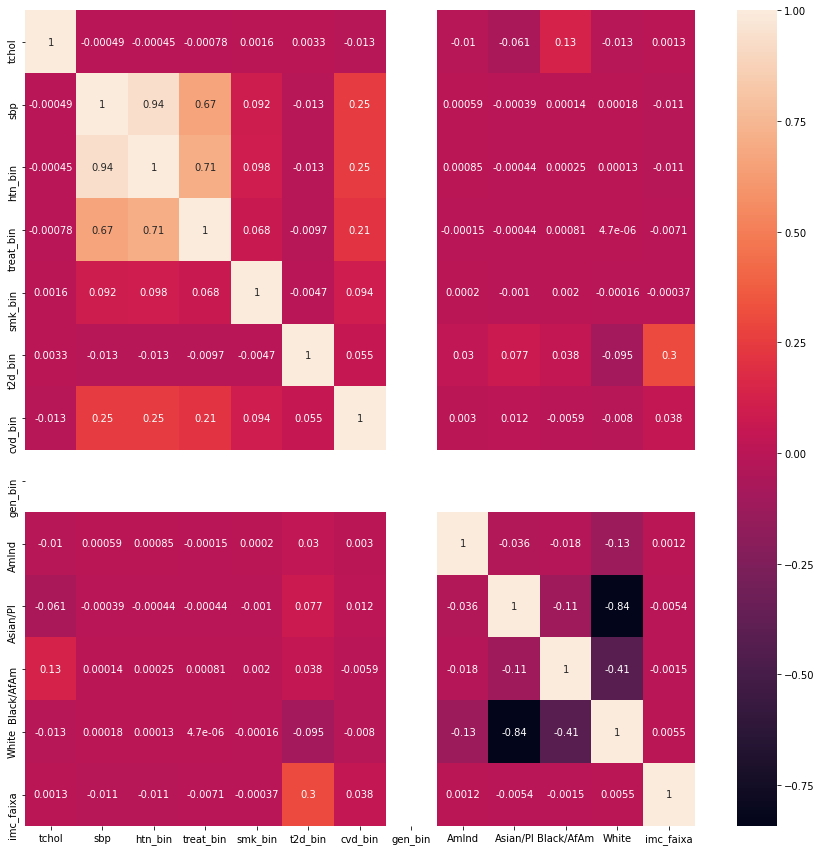

In [247]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)


In [153]:
def converte_genero(X):
  if X == 'M':
    return 1
  else:
    return 0

In [154]:
df['gen_bin'] = df.treat.map(converte_genero)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446203 entries, 0 to 446202
Data columns (total 19 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   patientID  446203 non-null  object
 1   age        446203 non-null  object
 2   htn        446203 non-null  object
 3   treat      446203 non-null  object
 4   smoking    446203 non-null  object
 5   race       446203 non-null  object
 6   t2d        446203 non-null  object
 7   gender     446203 non-null  object
 8   numAge     446203 non-null  int64 
 9   bmi        446203 non-null  int64 
 10  tchol      446203 non-null  int64 
 11  sbp        446203 non-null  int64 
 12  cvd        446203 non-null  object
 13  htn_bin    446203 non-null  int64 
 14  treat_bin  446203 non-null  int64 
 15  smk_bin    446203 non-null  int64 
 16  t2d_bin    446203 non-null  int64 
 17  cvd_bin    446203 non-null  int64 
 18  gen_bin    446203 non-null  int64 
dtypes: int64(10), object(9)
memory usage: 64.7+ 

In [156]:
df.race.value_counts()

White         335201
Asian/PI       84840
Black/AfAm     23722
AmInd           2440
Name: race, dtype: int64

In [157]:
df.head()

,patientID,age,htn,treat,smoking,race,t2d,gender,numAge,bmi,tchol,sbp,cvd,htn_bin,treat_bin,smk_bin,t2d_bin,cvd_bin,gen_bin
0,HHUID00519967,70-90,N,N,N,White,N,M,83,17,156,113,N,0,0,0,0,0,0
1,HHUID00379006,40-55,N,N,N,White,N,M,44,23,167,126,N,0,0,0,0,0,0
2,HHUID00357476,55-70,Y,Y,N,White,N,M,62,16,214,175,N,1,1,0,0,0,0
3,HHUID00862369,40-55,N,N,N,White,N,M,42,22,158,102,N,0,0,0,0,0,0
4,HHUID00481496,55-70,N,N,N,White,N,M,63,24,244,132,N,0,0,0,0,0,0


In [158]:
df.isnull().sum()

patientID    0
age          0
htn          0
treat        0
smoking      0
race         0
t2d          0
gender       0
numAge       0
bmi          0
tchol        0
sbp          0
cvd          0
htn_bin      0
treat_bin    0
smk_bin      0
t2d_bin      0
cvd_bin      0
gen_bin      0
dtype: int64

In [159]:
df.drop(['htn', 'treat', 'smoking', 't2d', 'gender', 'cvd'], axis = 1, inplace = True)
df.head()

,patientID,age,race,numAge,bmi,tchol,sbp,htn_bin,treat_bin,smk_bin,t2d_bin,cvd_bin,gen_bin
0,HHUID00519967,70-90,White,83,17,156,113,0,0,0,0,0,0
1,HHUID00379006,40-55,White,44,23,167,126,0,0,0,0,0,0
2,HHUID00357476,55-70,White,62,16,214,175,1,1,0,0,0,0
3,HHUID00862369,40-55,White,42,22,158,102,0,0,0,0,0,0
4,HHUID00481496,55-70,White,63,24,244,132,0,0,0,0,0,0


In [160]:
df = pd.concat([df,pd.get_dummies(df.race)], axis=1)
df.head()

,patientID,age,race,numAge,bmi,tchol,sbp,htn_bin,treat_bin,smk_bin,t2d_bin,cvd_bin,gen_bin,AmInd,Asian/PI,Black/AfAm,White
0,HHUID00519967,70-90,White,83,17,156,113,0,0,0,0,0,0,0,0,0,1
1,HHUID00379006,40-55,White,44,23,167,126,0,0,0,0,0,0,0,0,0,1
2,HHUID00357476,55-70,White,62,16,214,175,1,1,0,0,0,0,0,0,0,1
3,HHUID00862369,40-55,White,42,22,158,102,0,0,0,0,0,0,0,0,0,1
4,HHUID00481496,55-70,White,63,24,244,132,0,0,0,0,0,0,0,0,0,1


In [161]:
df.drop(['race'], axis = 1,inplace=True)

In [162]:
df.head()

,patientID,age,numAge,bmi,tchol,sbp,htn_bin,treat_bin,smk_bin,t2d_bin,cvd_bin,gen_bin,AmInd,Asian/PI,Black/AfAm,White
0,HHUID00519967,70-90,83,17,156,113,0,0,0,0,0,0,0,0,0,1
1,HHUID00379006,40-55,44,23,167,126,0,0,0,0,0,0,0,0,0,1
2,HHUID00357476,55-70,62,16,214,175,1,1,0,0,0,0,0,0,0,1
3,HHUID00862369,40-55,42,22,158,102,0,0,0,0,0,0,0,0,0,1
4,HHUID00481496,55-70,63,24,244,132,0,0,0,0,0,0,0,0,0,1


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [164]:
X_train,x_test,y_train,y_test = train_test_split(df.drop(['patientID','age','cvd_bin'],1),df.cvd_bin ,test_size=0.2)

In [165]:
lr = LogisticRegression()

In [166]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
# Meta: AUC > 0.75 | Sens > 80% | Espec: 95%

In [168]:
from sklearn.metrics import roc_auc_score

In [169]:
p = lr.predict(x_test)

In [170]:
print(roc_auc_score(y_test, p))

0.5356899598933861


In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
rf = RandomForestClassifier()

In [173]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [174]:
p_rf = rf.predict(x_test)

In [175]:
print(roc_auc_score(y_test, p_rf))

0.5615283543135274


In [176]:
df.head()

,patientID,age,numAge,bmi,tchol,sbp,htn_bin,treat_bin,smk_bin,t2d_bin,cvd_bin,gen_bin,AmInd,Asian/PI,Black/AfAm,White
0,HHUID00519967,70-90,83,17,156,113,0,0,0,0,0,0,0,0,0,1
1,HHUID00379006,40-55,44,23,167,126,0,0,0,0,0,0,0,0,0,1
2,HHUID00357476,55-70,62,16,214,175,1,1,0,0,0,0,0,0,0,1
3,HHUID00862369,40-55,42,22,158,102,0,0,0,0,0,0,0,0,0,1
4,HHUID00481496,55-70,63,24,244,132,0,0,0,0,0,0,0,0,0,1


In [177]:
df.drop(columns=['numAge', 'patientID'], axis=1, inplace=True)

In [178]:
df.head()

,age,bmi,tchol,sbp,htn_bin,treat_bin,smk_bin,t2d_bin,cvd_bin,gen_bin,AmInd,Asian/PI,Black/AfAm,White
0,70-90,17,156,113,0,0,0,0,0,0,0,0,0,1
1,40-55,23,167,126,0,0,0,0,0,0,0,0,0,1
2,55-70,16,214,175,1,1,0,0,0,0,0,0,0,1
3,40-55,22,158,102,0,0,0,0,0,0,0,0,0,1
4,55-70,24,244,132,0,0,0,0,0,0,0,0,0,1


In [179]:
X_train,x_test,y_train,y_test = train_test_split(df.drop(['cvd_bin'],1),df.cvd_bin ,test_size=0.2)

In [180]:
def converte_imc(X):

    if X < 18:
      return 1
    elif X < 25:
      return 2
    elif X < 30:
      return 3
    elif X < 35:
      return 4
    else: 
      return 5

In [181]:
df['imc_faixa'] = df.bmi.map(converte_imc)

In [182]:
df.head()

,age,bmi,tchol,sbp,htn_bin,treat_bin,smk_bin,t2d_bin,cvd_bin,gen_bin,AmInd,Asian/PI,Black/AfAm,White,imc_faixa
0,70-90,17,156,113,0,0,0,0,0,0,0,0,0,1,1
1,40-55,23,167,126,0,0,0,0,0,0,0,0,0,1,2
2,55-70,16,214,175,1,1,0,0,0,0,0,0,0,1,1
3,40-55,22,158,102,0,0,0,0,0,0,0,0,0,1,2
4,55-70,24,244,132,0,0,0,0,0,0,0,0,0,1,2


In [183]:
df.drop(["bmi"],axis=1,inplace=True)

In [184]:
df.head()

,age,tchol,sbp,htn_bin,treat_bin,smk_bin,t2d_bin,cvd_bin,gen_bin,AmInd,Asian/PI,Black/AfAm,White,imc_faixa
0,70-90,156,113,0,0,0,0,0,0,0,0,0,1,1
1,40-55,167,126,0,0,0,0,0,0,0,0,0,1,2
2,55-70,214,175,1,1,0,0,0,0,0,0,0,1,1
3,40-55,158,102,0,0,0,0,0,0,0,0,0,1,2
4,55-70,244,132,0,0,0,0,0,0,0,0,0,1,2


In [185]:
X_train,x_test,y_train,y_test = train_test_split(df.drop(['cvd_bin'],1),df.cvd_bin ,test_size=0.2)

#df = pd.concat([df,pd.get_dummies(df.imc_faixa)], axis=1)
#df.head()

In [186]:
!pip install xgboost

In [187]:
from xgboost import XGBClassifier

In [188]:
X_train,x_test,y_train,y_test = train_test_split(df.drop(['cvd_bin', 'age'],1),df.cvd_bin ,test_size=0.2)

In [189]:
xg = XGBClassifier()

In [190]:
# xg.fit(X_train,y_train)

In [191]:
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

In [192]:
# X_train,x_test,y_train,y_test = train_test_split(df.drop(['cvd_bin','age'],1),df.cvd_bin ,test_size=0.2)

In [193]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']

# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)

# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

In [194]:
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [195]:
# rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [196]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

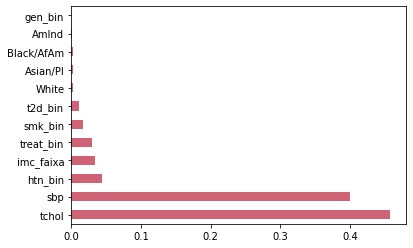

In [197]:
feat_importances = pd.Series(rf.feature_importances_, index= X_train.columns)
feat_importances.nlargest(20).plot(kind='barh',color='#cf6275')


In [198]:
X_imp = df[['tchol', 'sbp', 'htn_bin', 'imc_faixa']]

In [199]:
y = df.cvd_bin

In [200]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size=0.33)

In [201]:
rf_imp = RandomForestClassifier()


In [202]:
p_rfi = rf_imp.fit(X_train, y_train).predict(X_test)

In [203]:
print(roc_auc_score(y_test, p_rfi))

0.5105908602419629


In [204]:
from xgboost import XGBClassifier

In [240]:
xg = XGBClassifier(random_state=0)

In [206]:
p_xg = xg.fit(X_train,y_train).predict(X_test)

In [207]:
print(roc_auc_score(y_test, p_xg))

0.5


In [208]:
from sklearn.feature_selection import SelectKBest

In [209]:
df.head()

,age,tchol,sbp,htn_bin,treat_bin,smk_bin,t2d_bin,cvd_bin,gen_bin,AmInd,Asian/PI,Black/AfAm,White,imc_faixa
0,70-90,156,113,0,0,0,0,0,0,0,0,0,1,1
1,40-55,167,126,0,0,0,0,0,0,0,0,0,1,2
2,55-70,214,175,1,1,0,0,0,0,0,0,0,1,1
3,40-55,158,102,0,0,0,0,0,0,0,0,0,1,2
4,55-70,244,132,0,0,0,0,0,0,0,0,0,1,2


In [210]:
X = df.drop(["cvd_bin",'age'], axis=1).copy()
y = df['cvd_bin'].copy()

In [211]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [212]:
from sklearn.feature_selection import f_classif, SelectFromModel, SelectKBest
from sklearn.linear_model import Lasso

k=6
selector = SelectKBest(score_func= f_classif, k=k)

X2 = selector.fit_transform(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [6] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [213]:
X2

array([[113,   0,   0,   0,   0,   1],
       [126,   0,   0,   0,   0,   2],
       [175,   1,   1,   0,   0,   1],
       ...,
       [111,   0,   0,   0,   0,   1],
       [192,   1,   1,   0,   0,   3],
       [120,   0,   0,   0,   0,   2]])

In [214]:
X.loc[:, selector.get_support()]

,sbp,htn_bin,treat_bin,smk_bin,t2d_bin,imc_faixa
0,113,0,0,0,0,1
1,126,0,0,0,0,2
2,175,1,1,0,0,1
3,102,0,0,0,0,2
4,132,0,0,0,0,2
...,...,...,...,...,...,...
446198,168,1,1,0,0,2
446199,110,0,0,0,1,4
446200,111,0,0,0,0,1
446201,192,1,1,0,0,3


In [215]:
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.33)

In [216]:
p_xg = xg.fit(X_train,y_train).predict(X_test)

In [217]:
roc_auc_score(p_xg, y_test)

0.7670228586404273

In [218]:
X2.shape

(446203, 6)

In [220]:
X2 = pd.DataFrame(X2)

In [232]:
X3=pd.concat([X2,y],axis=1)

In [233]:
X3.columns = [0,1,2,3,4,5,6]

In [234]:
X2.head()

,0,1,2,3,4,5
0,113,0,0,0,0,1
1,126,0,0,0,0,2
2,175,1,1,0,0,1
3,102,0,0,0,0,2
4,132,0,0,0,0,2


In [235]:
X3[6]

0         0
1         0
2         0
3         0
4         0
         ..
446198    0
446199    0
446200    0
446201    1
446202    0
Name: 6, Length: 446203, dtype: int64

In [236]:
X3 = X3[(X3[0] < 180)]

In [237]:
y=X3[6]

In [238]:
X3.drop(6,axis=1,inplace=True)

In [248]:
X4 = X3.drop(0,axis=1)
X5 = X3.drop(1,axis=1)

In [249]:
X_train,X_test,y_train,y_test = train_test_split(X3,y,test_size=0.33)
p_xg = xg.fit(X_train,y_train).predict(X_test)
roc_auc_score(p_xg, y_test)

0.7435227516732821

In [250]:
X_train,X_test,y_train,y_test = train_test_split(X4,y,test_size=0.33)
p_xg = xg.fit(X_train,y_train).predict(X_test)
roc_auc_score(p_xg, y_test)

0.7622308415308914

In [251]:
X_train,X_test,y_train,y_test = train_test_split(X5,y,test_size=0.33)
p_xg = xg.fit(X_train,y_train).predict(X_test)
roc_auc_score(p_xg, y_test)

0.7580978532868812